# K-means Clustering in NumPy

In [216]:
import numpy as np
import sklearn as sk
import copy
import matplotlib.pyplot as plt

%matplotlib inline

## Algorithm

In [248]:
def generate_centroids(data, K):
    copied_data = sk.utils.shuffle(copy.copy(data))
    return copied_data[:K,:].reshape(K, copied_data.shape[1])

In [218]:
def recalculate_centroids(labeled_data, centroids, K):
    new_centroids = np.zeros((centroids.shape))
    for index in range(K):
        cluster = np.array([row[2:] for row in labeled_data if row[1] == index])
        new_centroids[index, :] = np.sum(cluster, axis=0)/len(cluster)
    
    delta_distance = calculate_euclidian(new_centroids,centroids)/K
    
    return new_centroids, delta_distance

In [219]:
def assign_data(labeled_data, centroids):
    for index in range(len(labeled_data)):
        labeled_data[index, 1] = np.argmin(np.array([calculate_euclidian(labeled_data[index, 2:], centroid) for centroid in centroids]))

In [220]:
def calculate_euclidian(vector_a, vector_b):
    return np.sqrt(((vector_a-vector_b)**2).sum())

In [221]:
class Convergence:
    
    def __init__(self, data):
        self.delta_distances = np.zeros((3,1))
        self.index = 0
        self.epsilon = 0.1

    def is_converged(self, delta_distance):
        self.delta_distances[self.index] = delta_distance
        self.index = self.index+1 if self.index < 2 else 0
        return self.delta_distances.sum() < self.epsilon

In [222]:
def label_data(data):
    # assuming data consists of n individual features where n is shape[1]
    labeled_data = np.ones((data.shape[0], data.shape[1]+2))
    # providing a unique identification for convenience
    index = np.arange(data.shape[0])
    # the first element will be the data id
    labeled_data[:,0] = index
    
    return labeled_data

In [230]:
def find_clusters(data, K):
    c = Convergence(data)
    labeled_data = label_data(data)
    centroids = generate_centroids(data, K)
    delta_distance = np.inf
    
    while not c.is_converged(delta_distance):
        # assigning points to centroids
        try:
            assign_data(labeled_data, centroids)
            centroids, delta_distance = recalculate_centroids(labeled_data, centroids, K)
            
        except ValueError:
            c = Convergence(data)
            centroids = generate_centroids(data)
            delta_distance = np.inf
            
    return labeled_data[:,1:]

In [231]:
nb_samples = 5000
samples = np.ones((nb_samples, 2))

distance = 2

for i in range(0,nb_samples,4):
    noise = np.random.normal(0,1,8)
    samples[i, :] = [-distance+noise[0],-distance+noise[1]]
    samples[i+1, :] = [distance+noise[2],-distance+noise[3]]
    samples[i+2, :] = [-distance+noise[4],distance+noise[5]]
    samples[i+3, :] = [distance+noise[6],distance+noise[7]]

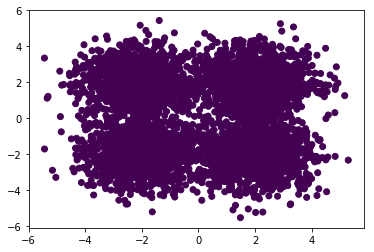

In [237]:
fig = plt.figure()
plt.scatter(samples[:,0],
            samples[:,1],
            c=np.ones((1,nb_samples)))

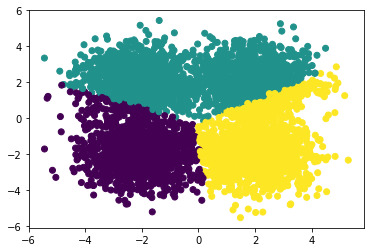

In [251]:
clustered = find_clusters(samples, K=3)
fig = plt.figure()
plt.scatter(clustered[:,1],
            clustered[:,2],
            c=clustered[:,0])

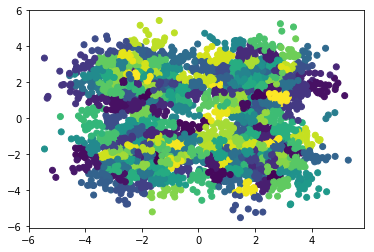

In [239]:
clustered = find_clusters(samples, K=256)
fig = plt.figure()
plt.scatter(clustered[:,1],
            clustered[:,2],
            c=clustered[:,0])